This notebook generates the figure illustrating multi-step prediction performance against naive temporal baselines, as described in Supplementary Material Section 8.3.

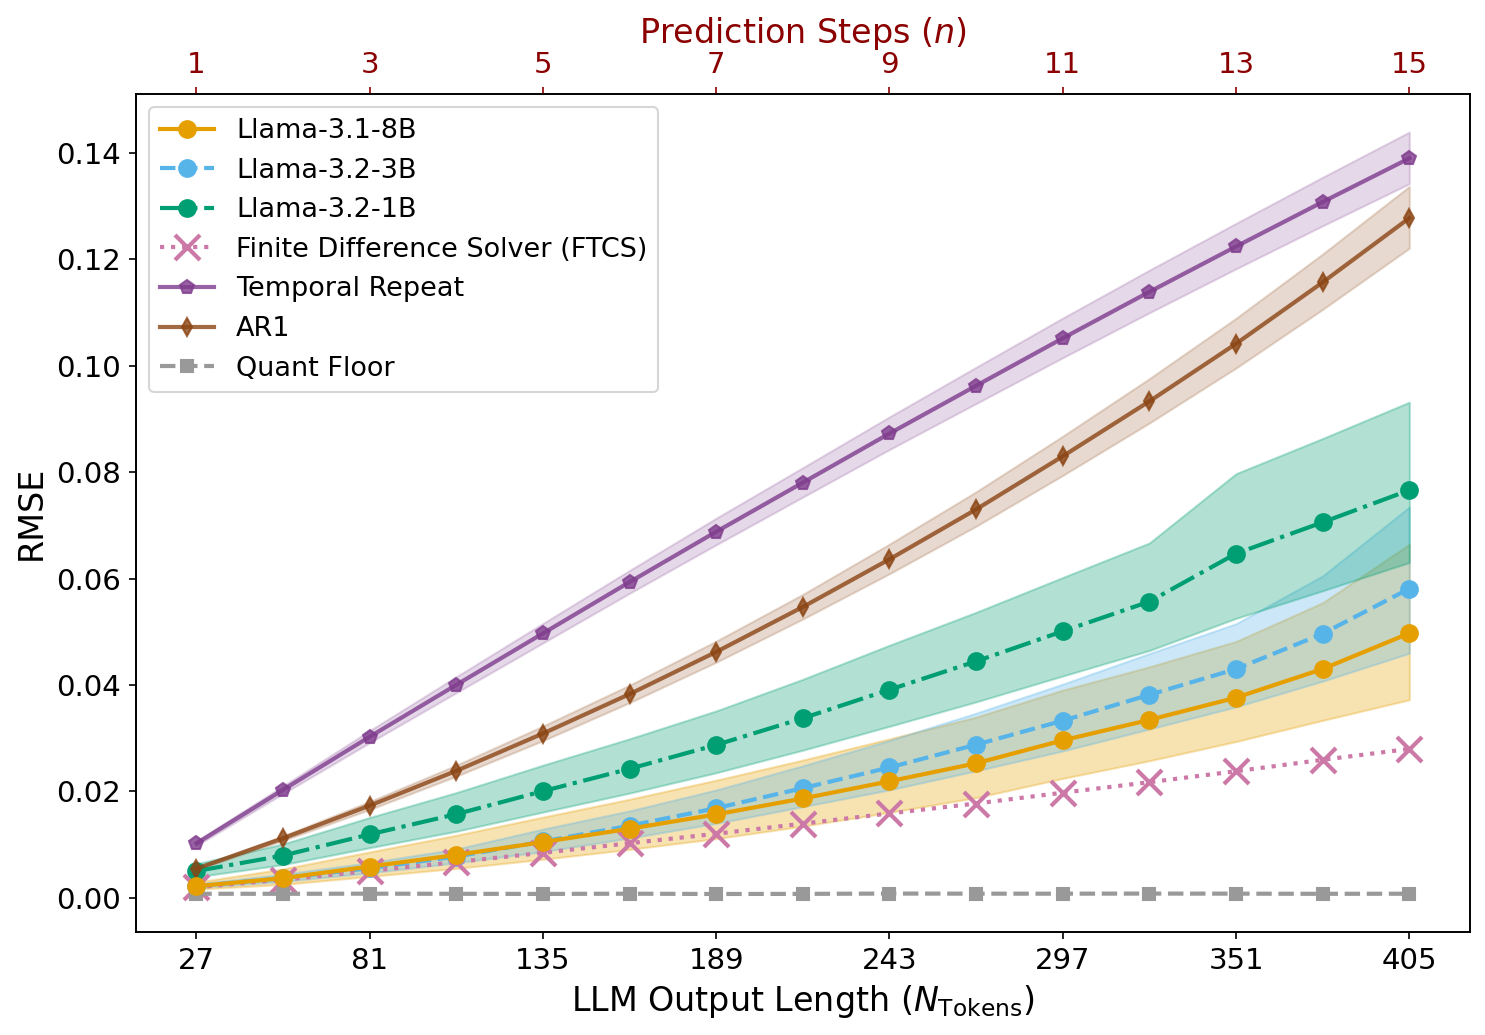

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with np.load("8B_15_step.npz", allow_pickle=True) as data_8b:
    llm_rmses = data_8b["llm_rmses_8B"]
    ci_lower_rmses = data_8b["ci_lower_rmses_8B"]
    ci_upper_rmses = data_8b["ci_upper_rmses_8B"]
    fd_results = data_8b["fd_results"].item()
    baseline_rmse_errors_prediction = data_8b["avg_baseline_rmse_errors_prediction"]

with np.load("3B_15_step.npz", allow_pickle=True) as data_3b:
    llm_rmses_3B = np.array(data_3b["llm_rmses_3B"])
    ci_lower_rmses_3B = data_3b["ci_lower_rmses_3B"]
    ci_upper_rmses_3B = data_3b["ci_upper_rmses_3B"]

with np.load("1B_15_step.npz", allow_pickle=True) as data_1b:
    llm_rmses_1B = np.array(data_1b["llm_rmses_1B"])
    ci_lower_rmses_1B = data_1b["ci_lower_rmses_1B"]
    ci_upper_rmses_1B = data_1b["ci_upper_rmses_1B"]

with np.load("AR_Repeat_15_step.npz", allow_pickle=True) as data_ar:
    ar_results = data_ar["ar_results"].item()
    ar1_rmses = np.array(ar_results['AR1']['rmses'])
    ar1_ci_lower_rmses = ar_results['AR1']['ci_lower_rmses']
    ar1_ci_upper_rmses = ar_results['AR1']['ci_upper_rmses']
    temporal_repeat_rmses = np.array(ar_results['Temporal_Repeat']['rmses'])
    temporal_repeat_ci_lower_rmses = ar_results['Temporal_Repeat']['ci_lower_rmses']
    temporal_repeat_ci_upper_rmses = ar_results['Temporal_Repeat']['ci_upper_rmses']

ftcs_rmse = fd_results['ftcs']['rmse']

fig, ax = plt.subplots(1, 1, figsize=(10, 7), dpi=150)
steps_array = np.arange(1, len(llm_rmses) + 1)

colors = [
    "#E69F00",
    "#56B4E9",
    "#009E73",
    "#CC79A7",
    "#999999",
    "#8B4513",
    "#7F3C8D",
]

linewidth = 2

ax.plot(steps_array, llm_rmses, 'o-', label='Llama-3.1-8B',
        color=colors[0], markersize=8, linewidth=linewidth, zorder=5)
ax.fill_between(steps_array, ci_lower_rmses, ci_upper_rmses,
                alpha=0.3, color=colors[0])

ax.plot(steps_array, llm_rmses_3B, 'o--', label='Llama-3.2-3B',
        color=colors[1], markersize=8, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_3B, ci_upper_rmses_3B,
                alpha=0.3, color=colors[1])

ax.plot(steps_array, llm_rmses_1B, 'o-.', label='Llama-3.2-1B',
        color=colors[2], markersize=8, linewidth=linewidth)
ax.fill_between(steps_array, ci_lower_rmses_1B, ci_upper_rmses_1B,
                alpha=0.3, color=colors[2])

ax.plot(steps_array[:len(ftcs_rmse)], ftcs_rmse, 'x:', markeredgewidth=2,
        label='Finite Difference Solver (FTCS)', color=colors[3], markersize=12, linewidth=linewidth)

ax.plot(steps_array, temporal_repeat_rmses, 'p-', label='Temporal Repeat',
        color=colors[6], markersize=7, linewidth=linewidth, alpha=0.8)
ax.fill_between(steps_array, temporal_repeat_ci_lower_rmses, temporal_repeat_ci_upper_rmses,
                alpha=0.2, color=colors[6])

ax.plot(steps_array, ar1_rmses, 'd-', label='AR1',
        color=colors[5], markersize=6, linewidth=linewidth, alpha=0.8)
ax.fill_between(steps_array, ar1_ci_lower_rmses, ar1_ci_upper_rmses,
                alpha=0.2, color=colors[5])

ax.plot(steps_array, baseline_rmse_errors_prediction[:len(steps_array)], 's--', color=colors[4],
        label='Quant Floor', markersize=6, linewidth=linewidth)

ax.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=16)
ax.set_ylabel("RMSE", fontsize=16)
#ax.set_title("Multi-Step Prediction Error (Linear Scale)", fontsize=18, fontweight='bold')

tick_positions = np.arange(1, len(steps_array) + 1, 2)
token_labels = [str(int(pos * 27)) for pos in tick_positions]
ax.set_xticks(tick_positions)
ax.set_xticklabels(token_labels)
ax.tick_params(axis='both', which='major', labelsize=14)

ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())
ax_top.set_xticks(tick_positions)
ax_top.set_xticklabels([str(int(pos)) for pos in tick_positions])
ax_top.set_xlabel("Prediction Steps ($n$)", fontsize=16, color='darkred')
ax_top.tick_params(axis='x', which='major', labelsize=14, colors='darkred')

ax.legend(loc='best', fontsize=13, handlelength=2, frameon=True)

plt.tight_layout()
plt.show()